In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === Step 1: Load both similarity matrices ===
cosine_df = pd.read_csv("../edges_calculation/results/avg_cosine_similarity_matrix.csv", index_col=0)
jaccard_df = pd.read_csv("../edges_calculation/results/jaccard_index_matrix.csv", index_col=0)




In [2]:
# === Step 2: Function to build graph from similarity matrix ===
def build_graph(df):
    G = nx.Graph()
    for i in df.index:
        for j in df.columns:
            if i != j:
                similarity = df.loc[i, j]
                G.add_edge(i, j, weight=similarity)
    return G



In [3]:
# === Step 3: Create graphs ===
G_cosine = build_graph(cosine_df)
G_jaccard = build_graph(jaccard_df)

# Use a fixed layout for consistency across plots
pos = nx.spring_layout(G_cosine, seed=42)



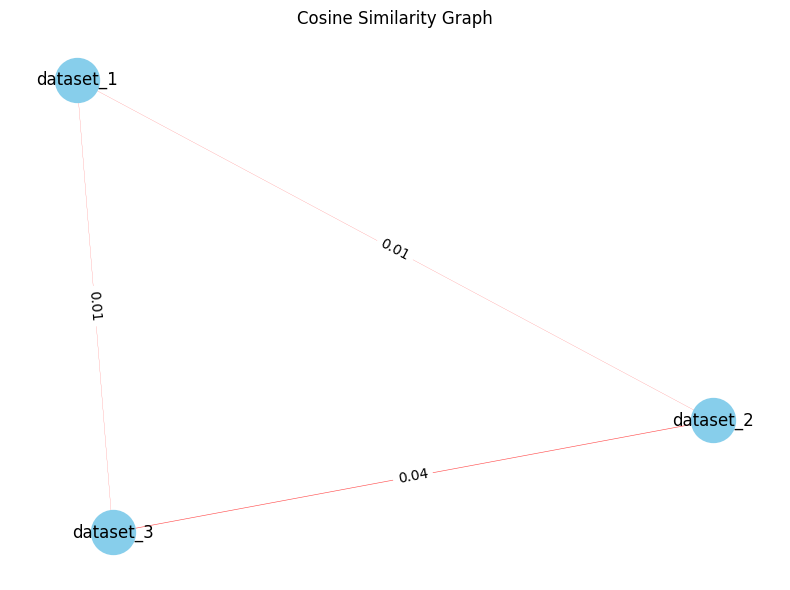

In [6]:
# === Draw and save Cosine Similarity Graph ===
plt.figure(figsize=(8, 6))
weights_cosine = [G_cosine[u][v]['weight'] * 10 for u, v in G_cosine.edges()]
nx.draw_networkx_nodes(G_cosine, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G_cosine, pos, font_size=12)
nx.draw_networkx_edges(G_cosine, pos, width=weights_cosine, edge_color='red', alpha=0.7)
cosine_labels = {(u, v): f"{G_cosine[u][v]['weight']:.2f}" for u, v in G_cosine.edges()}
nx.draw_networkx_edge_labels(G_cosine, pos, edge_labels=cosine_labels, font_size=10)
plt.title("Cosine Similarity Graph")
plt.axis('off')
plt.tight_layout()
plt.savefig("cosine_similarity_graph.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

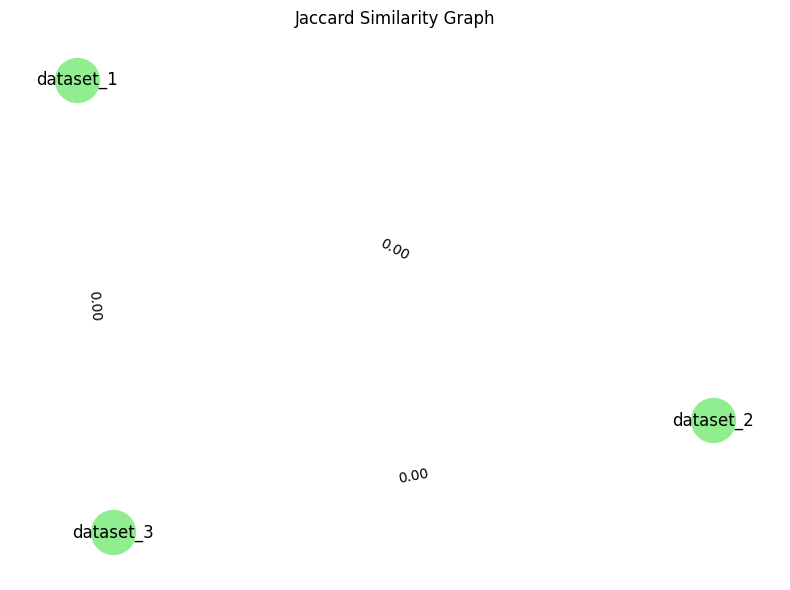

In [7]:
# === Draw and save Jaccard Similarity Graph ===
plt.figure(figsize=(8, 6))
weights_jaccard = [G_jaccard[u][v]['weight'] * 10 for u, v in G_jaccard.edges()]
nx.draw_networkx_nodes(G_jaccard, pos, node_color='lightgreen', node_size=1000)
nx.draw_networkx_labels(G_jaccard, pos, font_size=12)
nx.draw_networkx_edges(G_jaccard, pos, width=weights_jaccard, edge_color='blue', alpha=0.7)
jaccard_labels = {(u, v): f"{G_jaccard[u][v]['weight']:.2f}" for u, v in G_jaccard.edges()}
nx.draw_networkx_edge_labels(G_jaccard, pos, edge_labels=jaccard_labels, font_size=10)
plt.title("Jaccard Similarity Graph")
plt.axis('off')
plt.tight_layout()
plt.savefig("jaccard_similarity_graph.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

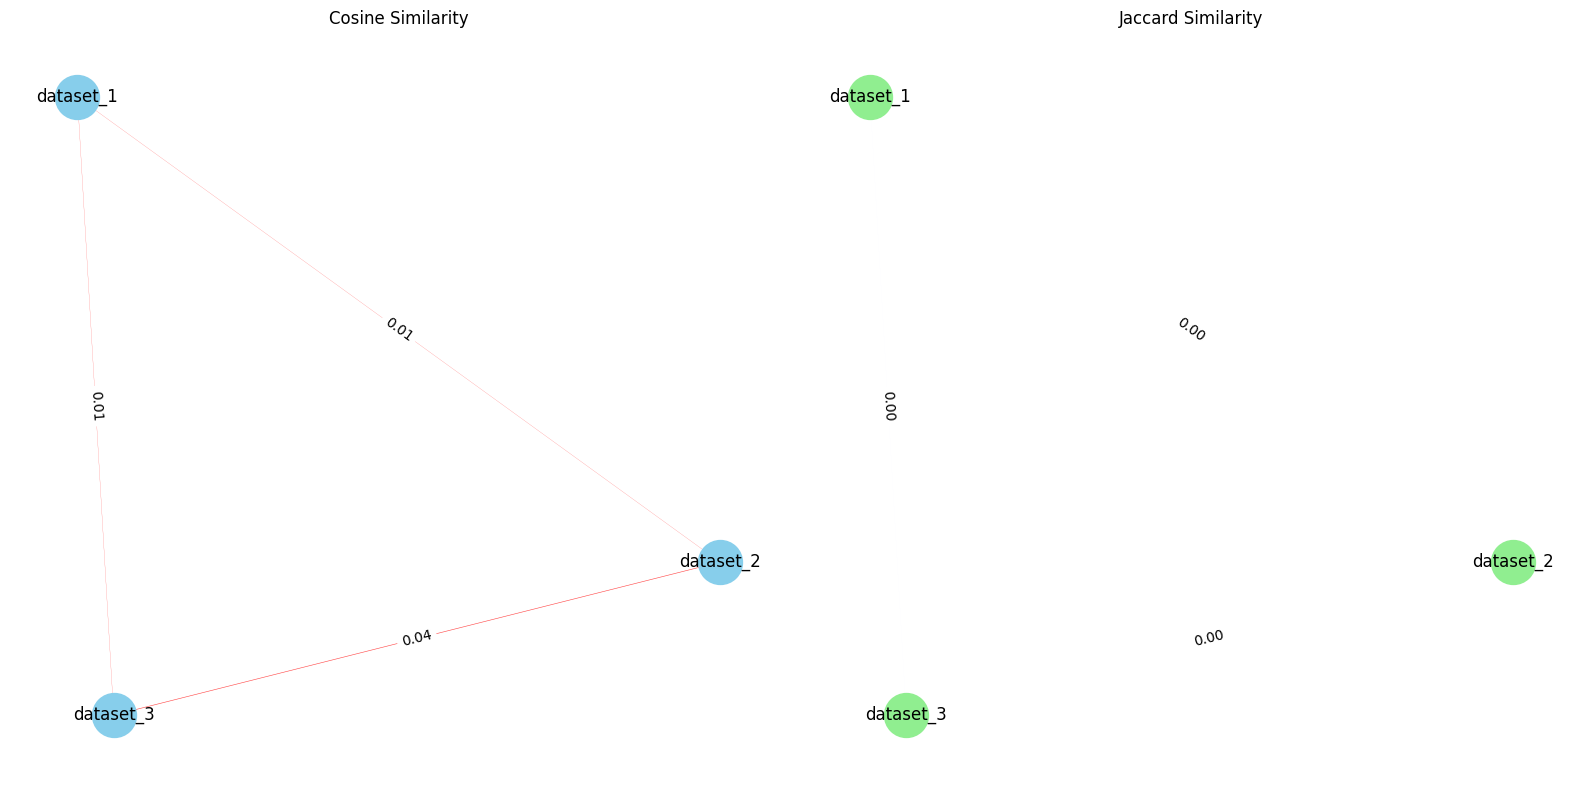

In [8]:
# === Draw and save Combined Side-by-Side Graph ===
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Cosine
nx.draw_networkx_nodes(G_cosine, pos, node_color='skyblue', node_size=1000, ax=axes[0])
nx.draw_networkx_labels(G_cosine, pos, font_size=12, ax=axes[0])
nx.draw_networkx_edges(G_cosine, pos, width=weights_cosine, edge_color='red', alpha=0.7, ax=axes[0])
nx.draw_networkx_edge_labels(G_cosine, pos, edge_labels=cosine_labels, font_size=10, ax=axes[0])
axes[0].set_title("Cosine Similarity")
axes[0].axis('off')

# Jaccard
nx.draw_networkx_nodes(G_jaccard, pos, node_color='lightgreen', node_size=1000, ax=axes[1])
nx.draw_networkx_labels(G_jaccard, pos, font_size=12, ax=axes[1])
nx.draw_networkx_edges(G_jaccard, pos, width=weights_jaccard, edge_color='blue', alpha=0.7, ax=axes[1])
nx.draw_networkx_edge_labels(G_jaccard, pos, edge_labels=jaccard_labels, font_size=10, ax=axes[1])
axes[1].set_title("Jaccard Similarity")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("cosine_vs_jaccard_similarity.png", dpi=300, bbox_inches='tight')
plt.show()